# Data Appendix

## Dane zostały pobrane z pliku AnalysisData/swietokrzyskie_clean.csv.

## 1. Informacje ogólne

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Odczytanie pliku csv
ds = pd.read_csv('../AnalysisData/swietokrzyskie_clean.csv')

# 5 pierwszych rekordów
ds.head(5)

,Dni od zakupu,Marka,Wiek kupującego,Płeć kupującego,Ocena
0,7,Beko,33.0,M,3.0
1,7,Beko,55.0,NaN,3.0
2,10,Beko,50.0,M,2.0
3,11,Tefal,36.0,M,2.5
4,3,Beko,62.0,K,2.5


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Dni od zakupu    466 non-null    int64  
 1   Marka            466 non-null    object 
 2   Wiek kupującego  418 non-null    float64
 3   Płeć kupującego  368 non-null    object 
 4   Ocena            466 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 18.3+ KB


### Braki w danych

Z powyższej informacji możemy wnioskować, że 48 osób nie podało wieku oraz 98 osób nie podało swojej płci. Oprócz tych kilku braków dane są kompletne, ponieważ liczba wartości nie będących nullem zgadza się z liczbą rekordów.

In [4]:
ds.describe(include='all')

,Dni od zakupu,Marka,Wiek kupującego,Płeć kupującego,Ocena
count,466.000000,466,418.000000,368,466.000000
unique,NaN,5,NaN,2,NaN
top,NaN,Beko,NaN,M,NaN
freq,NaN,323,NaN,238,NaN
mean,7.126609,NaN,40.186603,NaN,2.413090
std,2.764417,NaN,9.710367,NaN,1.081347
min,0.000000,NaN,18.000000,NaN,0.000000
25%,5.000000,NaN,33.250000,NaN,1.500000
50%,7.000000,NaN,40.000000,NaN,2.500000
75%,9.000000,NaN,47.000000,NaN,3.000000


### Dni od zakupu:
- średnia liczba dni, które minęła od zakupu wynosi od zakupu wynosi 7.12. 
- maksymalne dane pochodza z 17 dni wcześniej,
- pojawiają się także przypadki zakupu odkurzacza w dniu, w którym pobrane zostały dane.

### Marka
- najczęściej wybieraną marka jest Beko,
- w naszym zbiorze danych jest 5 różnych firm,
- firma Beko pojawiła sie 323 z 466 razy.

### Wiek kupującego
- średni wiek klientów wynosi 40.18.
- średnie odchylenie od tego wieku wynosi 9.71.
- najmłodsza osoba, która kupiła odkurzacz miała 18 lat, najstarsza 72.

### Płec kupującego
- częściej odkurzacze kupują mężczyźni (238 z 368 kompletnych informacji),

### Ocena
- średnia ocena wynosi 2.41, czyli dość nisko,
- najniższa ocena do 0.0, najwyższa to 5.0.
- 75% ocen jest poniżej oceny 3.0.

## 2. Analiza - Dni od zakupu.

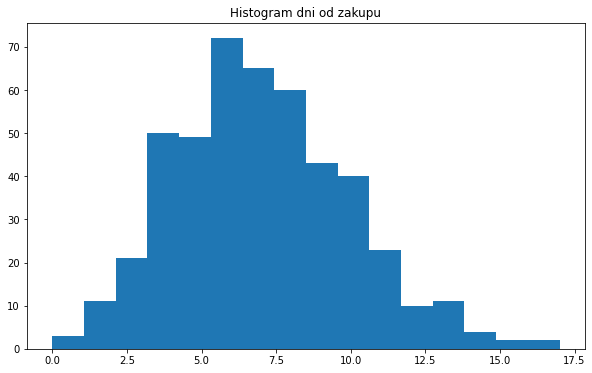

In [5]:
ds['Dni od zakupu'].hist(bins=16, grid=False, figsize=(10,6))
plt.title('Histogram dni od zakupu')
plt.show()

### Brak cykliczności
Najwięcej odkurzaczy zostało sprzedanych 5-8 dni temu, jest to ciekawa informacja, ponieważ moglibyśmy się spodziewać, że największa liczba sprzedanych odkurzaczy będzie powtarzać się cyklicznie na przykład co 7 dni z powodu weekendu.

## 3. Analiza - Marka.

Frequency table
Value      freq
Beko          323
Tefal          48
Electrolux     47
Dyson          34
Samsung        14
Name: Marka, dtype: int64


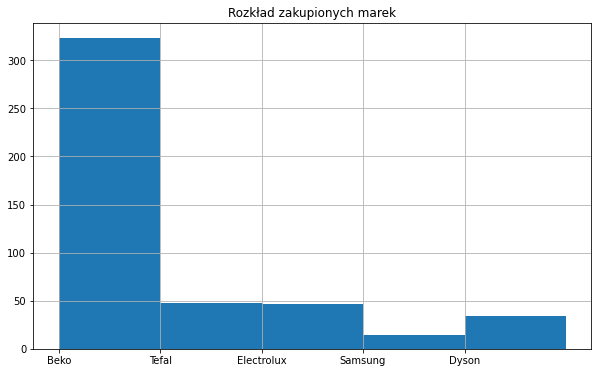

In [6]:
print("Frequency table\nValue      freq")
print(ds['Marka'].value_counts())

ds['Marka'].hist(bins=range(0, 6), grid=True, figsize=(10,6))
plt.title('Rozkład zakupionych marek')
plt.show()

## Liczba zakupionych

Najczęściej wybieraną marką jest Beko: 323 sztuki. Najmniej kupiono odkurzaczy firmy Samsung: 14.

## 4. Analiza - Wiek kupującego

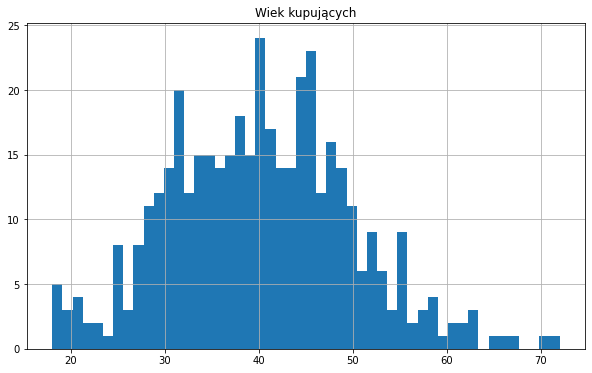

In [7]:
n = len(ds['Wiek kupującego'].value_counts())

ds['Wiek kupującego'].hist(bins=50, grid=True, figsize=(10,6))
plt.title('Wiek kupujących')
plt.show()

## Wiek

Najwięcej osób kupujących odkurzacze jest w wieku 30 - 50 lat. 

## 5. Analiza - Płeć kupującego.

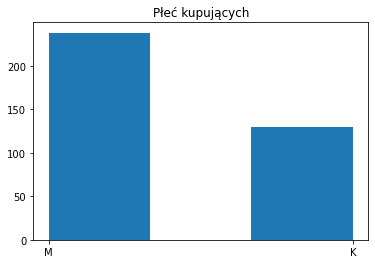

In [8]:
ds['Płeć kupującego'].hist(bins=3, grid=False)
plt.title('Płeć kupujących')
plt.show()

## Przewaga
Wśród osób, które podały informacje na temat płci jest znacznie więcej mężczyzn.

## 6. Analiza - Ocena

Rozkład ocen
Ocena  ilość
2.0    92
2.5    78
1.5    67
3.0    59
1.0    47
3.5    47
4.0    30
0.5    16
5.0    14
4.5    13
0.0     3
Name: Ocena, dtype: int64


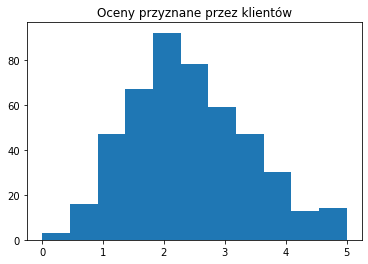

In [9]:
print("Rozkład ocen\nOcena  ilość")
print(ds['Ocena'].value_counts())

ds['Ocena'].hist(bins=11, grid=False)
plt.title('Oceny przyznane przez klientów')
plt.show()

## Rozkład ocen

Najwięcej przyznano ocen 2.0. Przyznano więcej ocen 5.0 niż 0.0. Rozkład przypomina krzywą gaussa co jest zgodne z logiką.

# 7. Dodatkowa analiza w celu znalezienia korelacji pomiędzy zmiennymi.

## Zależność satysfakcji od wieku 

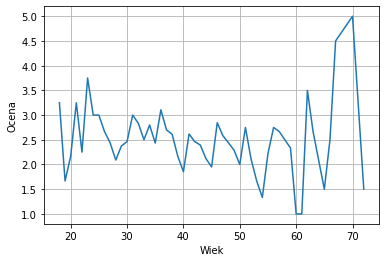

In [10]:
ds_age = ds[['Wiek kupującego', 'Ocena']]
ds_age = ds_age.dropna()
ds_gb = ds_age.groupby(by='Wiek kupującego').mean()
plt.plot(ds_gb)
plt.xlabel('Wiek')
plt.ylabel('Ocena')
plt.grid()


### Możemy zauważyć, że najlepsza średnia ocen została przyznana przez osoby w wieku 70 lat. Najgorsze oceny przydzieliły za to osoby w wieku 60-61 lat, gdzie średnia ocen wyniosła 1.0. Można zauważyć, że najlepsze oceny przydzielają osoby młodsze oraz starsze. Najgorsze oceny są przydzielane przez osoby w średnim wieku.

## Zależność satysfakcji od płci

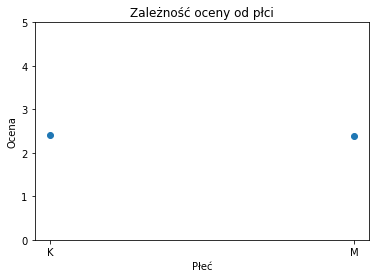

In [11]:
ds_sex = ds[['Płeć kupującego', 'Ocena']]
ds_sex = ds_sex.dropna()
ds_gb = ds_sex.groupby(by='Płeć kupującego').mean()
plt.plot(ds_gb, 'o')
plt.xlabel('Płeć')
plt.ylabel('Ocena')
plt.title('Zależność oceny od płci')
plt.grid()
plt.grid(False)
plt.ylim([0, 5])
plt.show()

### Możemy zauważyć, że średnia ocen nie różni się znacznie wśród mężczyzn i kobiet.

## Zależność wyboru marki od wieku.

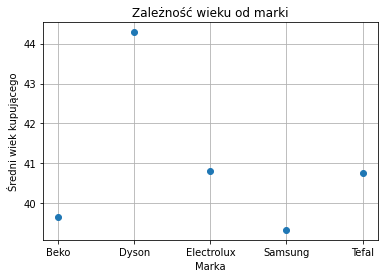

In [20]:
ds_sex = ds[['Marka', 'Wiek kupującego']]
ds_sex = ds_sex.dropna()
ds_gb = ds_sex.groupby(by='Marka').mean()
plt.plot(ds_gb, 'o')
plt.xlabel('Marka')
plt.ylabel('Średni wiek kupującego')
plt.title('Zależność wieku od marki')
plt.grid(True)
plt.show()

### Widać, że głównie starsi klienci decydują się na wybór marki Dyson (średnia różni się o 5 lat względem Samsunga i Beko).

## Zależność oceny od marki.

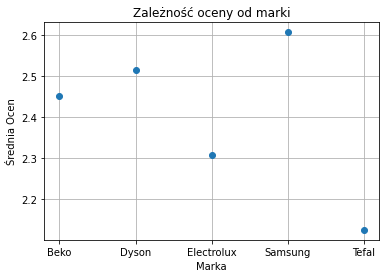

In [18]:
ds_sex = ds[['Marka', 'Ocena']]
ds_sex = ds_sex.dropna()
ds_gb = ds_sex.groupby(by='Marka').mean()
plt.plot(ds_gb, 'o')
plt.xlabel('Marka')
plt.ylabel('Średnia Ocen')
plt.title('Zależność oceny od marki')
plt.grid(True)
plt.show()

### Według klientów najlepiej działają odkurzacze marki Samsung a najgorsze jakościowo są odkurzacze marki Tefal. Warto jednak zwrócić uwagę na to, że najwięcej osób kupuje odkurzacze marki Beko, więc możliwe, że stosunek jakości do ceny jest najlepszy.